## **Welcome to the KU Glaciology Xarray tutorial**
### This will be a combination of the [Xarray in 45 minutes](https://tutorial.xarray.dev/overview/xarray-in-45-min) tutorial with some datasets that we work with, a brief use of `rioxarray`, and the Xarray [Data Tidying](https://tutorial.xarray.dev/data_cleaning/ice_velocity.html) tutorial with a MEaSUREs InSAR-Based Ice Velocity of the Amundsen Sea Embayment velocity data set within Xarray.tutorials

In this lesson, we cover the basics of Xarray data structures. By the
end of the lesson, we will be able to:

- Understand the basic data structures in Xarray
- Inspect `DataArray` and `Dataset` objects.
- Read and write netCDF files using Xarray.
- Understand that there are many packages that build on top of xarray


We'll start by reviewing the various components of the Xarray data model, represented here visually:

<img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" align="center" width="60%">

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import geopandas as gpd

%matplotlib inline
%config InlineBackend.figure_format='retina'

We will start with ice discharge datasets from [Mankoff et al., 2020](https://essd.copernicus.org/articles/12/1367/2020/) which includes `gate.nc`, `GIS.nc`, and `region.nc`

First let's open the `gate.nc` dataset

In [3]:
gate_ds = xr.open_dataset('./mankoff_ice_discharge/gate.nc')

## What's in a Dataset? 

*Many DataArrays!* 

What's a DataArray?

Datasets are dictionary-like containers of DataArrays. They are a mapping of
variable name to DataArray:

In [4]:
gate_ds

<xarray.Dataset>
Dimensions:        (time: 2735, gate: 267)
Coordinates:
  * time           (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2023-08-07
  * gate           (gate) int64 1 3 4 5 6 7 8 10 ... 350 352 353 354 355 356 357
Data variables: (12/14)
    discharge      (gate, time) float32 ...
    err            (gate, time) float32 ...
    coverage       (gate, time) float32 ...
    mean_x         (gate) int32 ...
    mean_y         (gate) int32 ...
    mean_lon       (gate) float32 ...
    ...             ...
    region         (gate) object ...
    Zwally_2012    (gate) int64 ...
    name_Bjørk     (gate) object ...
    name_Mouginot  (gate) object ...
    ID_Moon        (gate) int64 ...
    ID_Moon_dist   (gate) int64 ...
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: 9f49d54
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

How do we index data from a dataset?

## What's in a Dataset? 

*Many DataArrays!* 

What's a DataArray?

Datasets are dictionary-like containers of DataArrays. They are a mapping of
variable name to DataArray:

In [5]:
gate_ds['discharge']

<xarray.DataArray 'discharge' (gate: 267, time: 2735)>
[730245 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2023-08-07
  * gate     (gate) int64 1 3 4 5 6 7 8 10 ... 349 350 352 353 354 355 356 357
Attributes:
    long_name:      Discharge
    standard_name:  land_ice_mass_tranport_due_to_calving_and_ice_front_melting
    units:          Gt yr-1

You can save some typing by using the "attribute" or "dot" notation. This won't
work for variable names that clash with a built-in method name (like `mean` for
example).


In [6]:
gate_ds.discharge

<xarray.DataArray 'discharge' (gate: 267, time: 2735)>
[730245 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2023-08-07
  * gate     (gate) int64 1 3 4 5 6 7 8 10 ... 349 350 352 353 354 355 356 357
Attributes:
    long_name:      Discharge
    standard_name:  land_ice_mass_tranport_due_to_calving_and_ice_front_melting
    units:          Gt yr-1

## What's in a DataArray? 

*data + (a lot of) metadata*


### Named dimensions 

`.dims` correspond to the axes of your data. 

In this case we have 2 dimensions `gate` and `time`.

In [7]:
gate_ds.discharge.dims

('gate', 'time')

### Coordinate variables 

`.coords` is a simple [data container](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#coordinates)
for coordinate variables.

Here we see the actual timestamps and gate numbers of our ice discharge data:

In [8]:
gate_ds.discharge.coords

Coordinates:
  * time     (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2023-08-07
  * gate     (gate) int64 1 3 4 5 6 7 8 10 ... 349 350 352 353 354 355 356 357

The `*` to the left of the coordinate name is very important. It signifies that the coordinate is a **dimension coordinate** that can be used for label based indexing. A **dimension coordinate** is when a coordinate and dimension have the same name

### Arbitrary attributes 

`.attrs` is a dictionary that can contain arbitrary Python objects (strings, lists, integers, dictionaries, etc.) Your only
limitation is that some attributes may not be writeable to certain file formats.

In [9]:
gate_ds.discharge.attrs

{'long_name': 'Discharge',
 'standard_name': 'land_ice_mass_tranport_due_to_calving_and_ice_front_melting',
 'units': 'Gt yr-1'}

Okay, now lets have some fun and select the data we want and vizualize it!

## Indexing and Visualization

<img src="./index_table.png" align="center" width="60%">

image from [Indexing and selecting data](https://docs.xarray.dev/en/stable/user-guide/indexing.html#quick-overview) user guide

First let's see what is in our Xarray dataset `gate_ds` again

In [10]:
gate_ds

<xarray.Dataset>
Dimensions:        (time: 2735, gate: 267)
Coordinates:
  * time           (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2023-08-07
  * gate           (gate) int64 1 3 4 5 6 7 8 10 ... 350 352 353 354 355 356 357
Data variables: (12/14)
    discharge      (gate, time) float32 ...
    err            (gate, time) float32 ...
    coverage       (gate, time) float32 ...
    mean_x         (gate) int32 ...
    mean_y         (gate) int32 ...
    mean_lon       (gate) float32 ...
    ...             ...
    region         (gate) object ...
    Zwally_2012    (gate) int64 ...
    name_Bjørk     (gate) object ...
    name_Mouginot  (gate) object ...
    ID_Moon        (gate) int64 ...
    ID_Moon_dist   (gate) int64 ...
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: 9f49d54
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

Now let's plot the discharge of the first gate

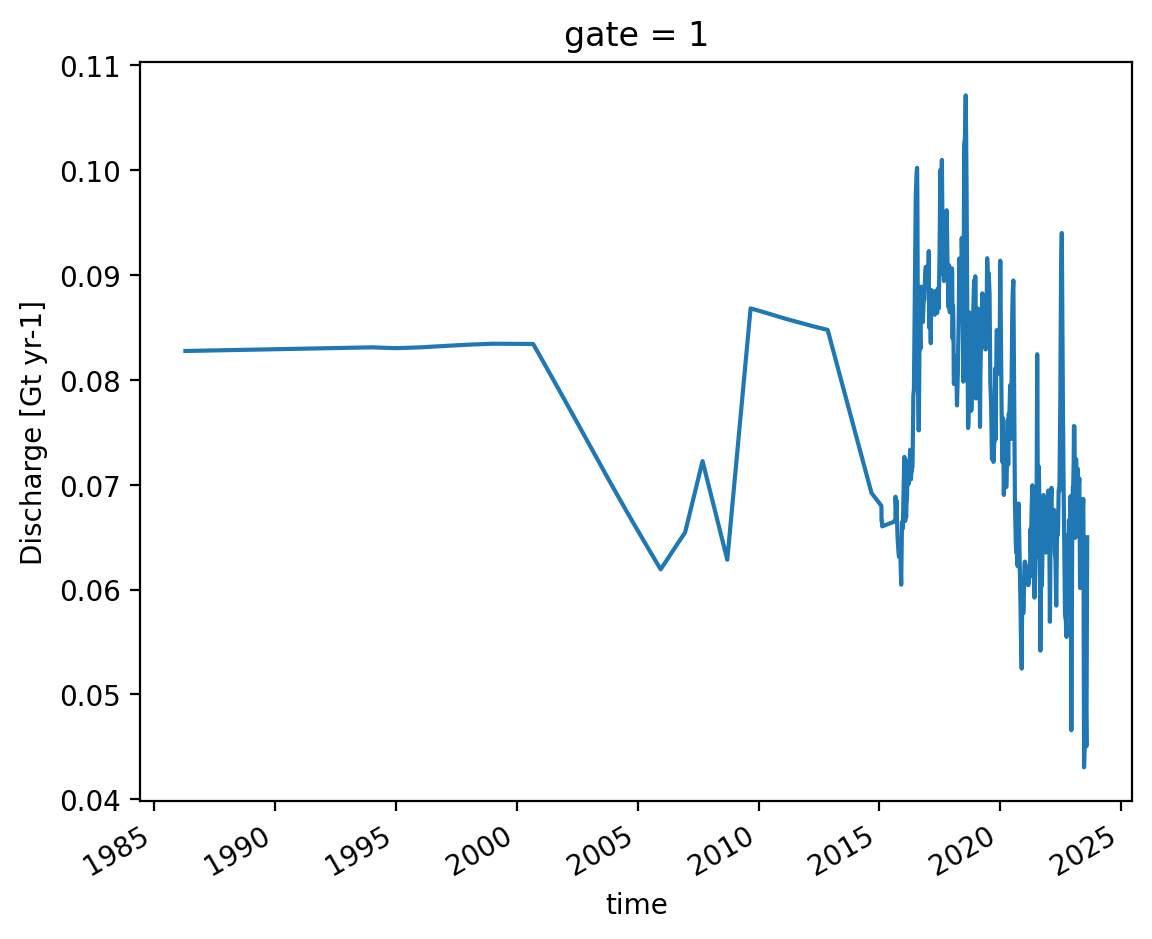

In [11]:
gate_ds.discharge.sel(gate=1).plot()

After a plotting an unknown glacier at gate 1, let's find some glaciers of interest and plot them together. We can look up text based glacier names with some of the data variables provided sush as `name_Bjørk` and `name_Mouginot`

In [12]:
gate_ds.name_Bjørk.data

array(['Jungersen Gletsjer', 'Jungersen Gletsjer',
       'Marie Sophie Gletsjer', 'Hagen Br', 'Harder Gletsjer',
       'Academy GGletsjer', 'C.H. Ostenfeld Gletsjer', 'Ryder Gletsjer',
       'C.H. Ostenfeld Gletsjer', 'Steensby Gletsjer',
       'C.H. Ostenfeld Gletsjer', 'C.H. Ostenfeld Gletsjer',
       'Ryder Gletsjer', 'Ryder Gletsjer', 'Sigurd Berg Gletsjer',
       'Porsild Gletsjer', 'Petermann Gletsjer', 'Sermersuaq',
       'Zachariae Isstrm', 'Sermersuaq', 'Zachariae Isstrm',
       'Arfalluarfiup Sermia', 'Arfalluarfiup Sermia', 'Neqip Sermia',
       'Kangerluarsuup Sermia', 'Toornaarsulissuup Sermii',
       'Toornaarsulissuup Sermii', 'Tuttulipaluup Sermia',
       'Qeqertaarsuusarsuup Sermia', 'Qaqujaarsuup Sermia',
       'Ullip Sermia', 'Ullip Sermia', 'Ullip Sermia', 'Ullip Sermia',
       'Savissuup Sermia', 'Savissuup Sermia', 'Savissuup Sermia',
       'Yngvar Nielsen Gletsjer', 'Yngvar Nielsen Gletsjer',
       'Innaqqissorsuup Oqquani Sermeq', 'Yngvar Nielsen 

Lets's pick these glaciers 'Sermeq Kujalleq', 'Petermann Gletsjer', 'Zachariae Isstrm', 'Helheim Gletsjer'

In [13]:
bjork_names_list = ['Sermeq Kujalleq', 'Petermann Gletsjer', 'Zachariae Isstrm', 'Helheim Gletsjer']
#gate_ds.set_coords('name_Bjørk')
mask = gate_ds.name_Bjørk.isin(bjork_names_list)
gate_ds.where(mask,drop=True).name_Bjørk

<xarray.DataArray 'name_Bjørk' (gate: 9)>
array(['Petermann Gletsjer', 'Zachariae Isstrm', 'Zachariae Isstrm',
       'Sermeq Kujalleq', 'Sermeq Kujalleq', 'Sermeq Kujalleq',
       'Sermeq Kujalleq', 'Sermeq Kujalleq', 'Helheim Gletsjer'],
      dtype=object)
Coordinates:
  * gate     (gate) int64 27 29 31 125 126 165 169 184 231
Attributes:
    long_name:  Nearest name from Bjørk (2015)

Uh-oh!! Looks like we have some glaciers with the same name? What do we do? 
Let's look at the `name_Mouginot` data variable at the above gate indices and see if they differ

In [14]:
mouginot_name_list = ['JAKOBSHAVN_ISBRAE', 'PETERMANN_GLETSCHER', 'ZACHARIAE_ISSTROM', 'HELHEIMGLETSCHER']
mask_mouginot = gate_ds.name_Mouginot.isin(mouginot_name_list)
gate_indices = gate_ds.where(mask_mouginot,drop=True).gate.data

Now with our unique glacier indices lets plot them all on the same figure. We need to use a for loop for this and iterate over the `gate_indices`

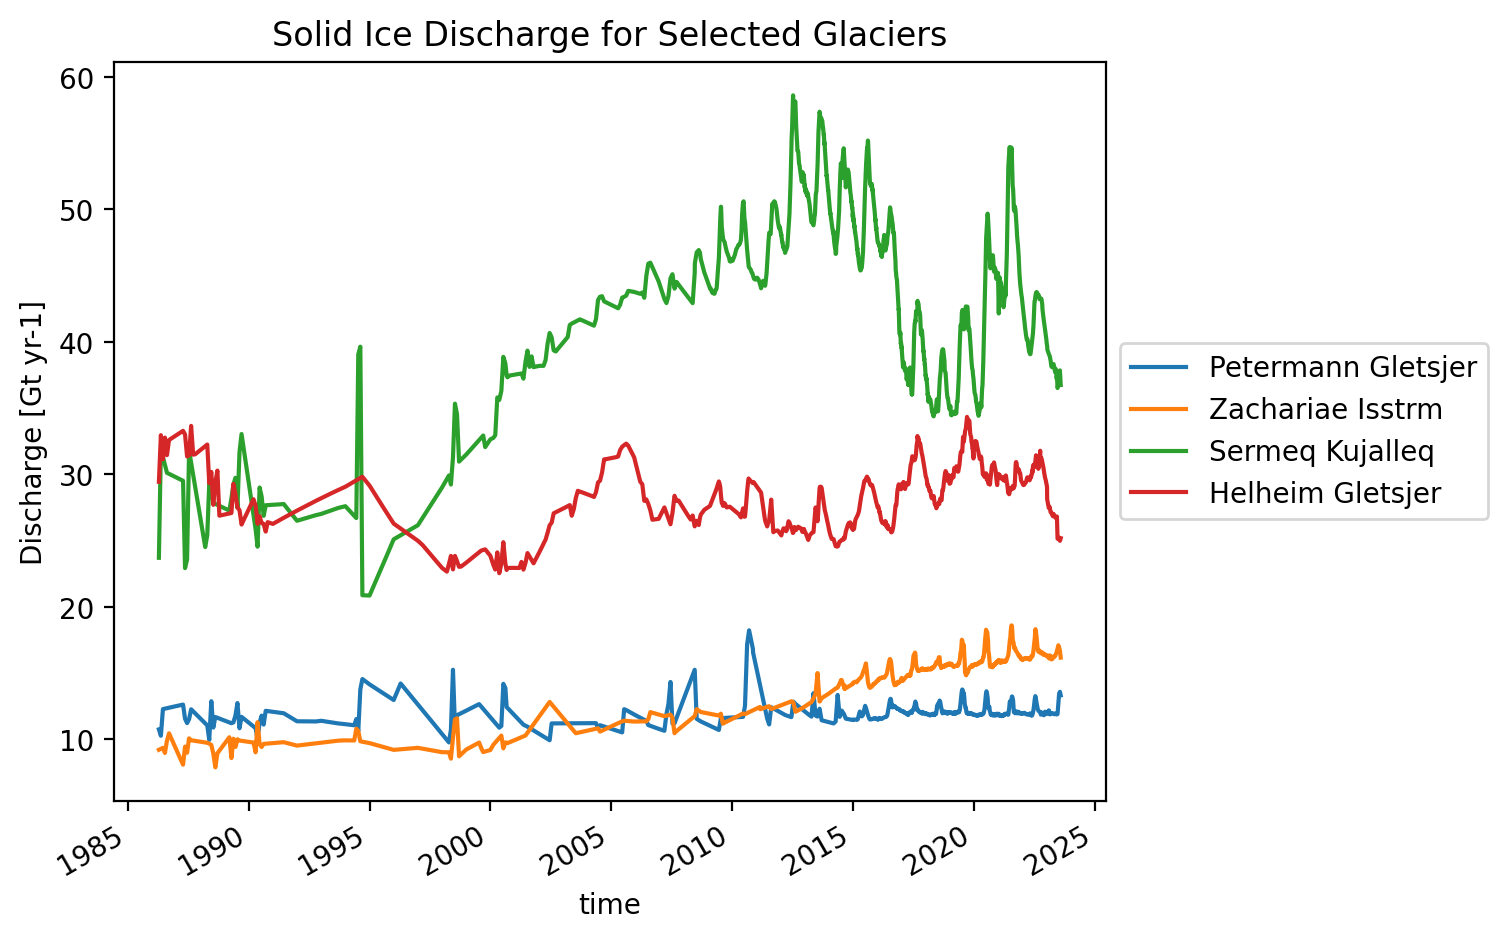

In [15]:
gate_ds_subset = gate_ds.sel(gate=gate_indices)
for gate in gate_indices:
    bjork_name = gate_ds_subset.name_Bjørk.sel(gate=gate).data
    gate_ds_subset.discharge.sel(gate=gate).plot(label=bjork_name,add_legend=True)
plt.title('Solid Ice Discharge for Selected Glaciers')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

We did it! We indexed our glaciers of choice and visualized their discharge. Now let's work with data with a spatial dimension provided by Malisse

## Working with spatial data and rioxarray

`rioxarray` is a geospatial xarray extension powered by rasterio. With `rioxarray` we can incorporate the benifits of rasterio and geospatial objects like geometries into our workflow. Here we will:

- read and clip a dataset with a shapefile
- average spatial data over a time dimension 
- visualize spatial data and time series

First let's read precipitation .nc file provided by Malisse `pr_CESM2_historical_r10i1p1f1_gn_BCSDm_fine_monthly.nc` and a shapefile of Nepal's boundary `/nepal/nepal.shp`

In [16]:
pr_ds = xr.open_dataset('./precip_nc/pr_CESM2_historical_r10i1p1f1_gn_BCSDm_fine_monthly.nc')
nepal_df = gpd.read_file('./nepal_geom/nepal.shp')

FileNotFoundError: [Errno 2] No such file or directory: '/media/laserglaciers/upernavik/x_array_nc_tutorial/precip_nc/pr_CESM2_historical_r10i1p1f1_gn_BCSDm_fine_monthly.nc'

With `rioxarray` installed in the same environment as xarray we can use the very helpful `rio` accessor in xarray. The `rio` accessor is rioxarray and provides lots of rasterio's functionality to xarray Datasets and DataArrays. 

Let's use the rio accessor to clip `pr_ds` to `nepal_df`'s geometry. First let's visualize `pr_ds` at time 2000-01

In [17]:
pr_ds.pr.sel(time='2000-01').plot(vmin=0,vmax=0.0001)

NameError: name 'pr_ds' is not defined

In order to use the rio accessor we need to assign the `pr_ds` a crs. We can do that by pr_ds.rio.write_crs('EPSG:4326',inplace=True). `inplace=True` just writes the crs to the dataset at that line so you don't need to assign a new variable to the modified dataset.

To clip a dataset to a GeoPandas GeoDataFrame we need to provide the GeoDataFrame's geometry and crs. Other parameters such as `drop=True` will drop the data outside of the extent of the mask geometries Otherwise, it will return the same raster with the data masked. `invert=False`  If False, pixels that do not overlap shapes will be set as nodata. Otherwise, pixels that overlap the shapes will be set as nodata. False by default.

In [18]:
pr_ds.rio.write_crs('EPSG:4326',inplace=True)

pecip_00_13 = pr_ds.pr.sel(time=slice('2000','2013'))

nepal_precip = pecip_00_13.rio.clip(nepal_df.geometry.values,nepal_df.crs,drop=True,invert=False)

NameError: name 'pr_ds' is not defined

In [19]:
nepal_precip.sel(time='2000-01').plot(vmin=0,vmax=0.0001)

NameError: name 'nepal_precip' is not defined

In [20]:
nepal_precip.sel(time='2000-07').plot(vmin=0,vmax=0.0001)

NameError: name 'nepal_precip' is not defined

In [21]:
# import hvplot.xarray
# import panel.widgets as pnw

# #time = pnw.Player(name='time', start=0, end=100, loop_policy='loop', interval=100)

# #nepal_precip.hvplot(groupby='time',clim=(0, 0.0001))
# nepal_precip.interactive.sel(time=pnw.DiscreteSlider).plot()

Now let's take the mean of nepal_precip across the time dimension and plot the results.

In [22]:
# nepal_precip.mean('time').plot()
mean_per_time = nepal_precip.mean(axis=(1,2)) # axis=(1,2) gets the time slices for this data set
time_i = xr.CFTimeIndex(mean_per_time.time.values)
time_pd = time_i.to_datetimeindex() # convert cftime index to pd index

fig, ax = plt.subplots()

ax.plot(time_pd,mean_per_time.values)
ax.set_title('Nepal Precipitation')
ax.set_ylabel('mm d$^{-1}$')
plt.tight_layout()

NameError: name 'nepal_precip' is not defined

There are other ways to take the mean through time, but for this particular dataset axis(1,2) seems to work. Look at [Monthly Means](https://docs.xarray.dev/en/stable/examples/monthly-means.html) tutorial for other examples with xarray

## **Re-organize InSAR ice velocity data**
### This is a slightly modified version of [this](https://tutorial.xarray.dev/data_cleaning/ice_velocity.html) tutorial 

This is an example of cleaning data accessed in netcdf format and preparing it for analysis. 

The dataset we will use contains InSAR-derived ice velocity for 10 years over the Amundsen Sea Embayment in Antarctica. The data is downloaded from: https://nsidc.org/data/NSIDC-0545/versions/1 but this example uses only a subset of the full dataset.

Downloaded data is `.hdr` and `.dat` files for each year, and a `.nc` for all of the years together. 

The `.nc` object is a dataset with dimensions x,y and data vars for each year. So for each year there are `vx`,`vy`,`err` vars. We'd like to re-organize this so that there are 3 variables (`vx`, `vy` and `err`) that exist along a time dimension.

```{note}
These steps were turned into a accessor/extension example, which can be viewed [here](/advanced/accessors/01_accessor_examples).
```

In [23]:
ds = xr.tutorial.open_dataset('ASE_ice_velocity.nc')

Take a look at the dataset:

In [24]:
ds

<xarray.Dataset>
Dimensions:  (ny: 800, nx: 500)
Dimensions without coordinates: ny, nx
Data variables: (12/32)
    vx1996   (ny, nx) float32 ...
    vy1996   (ny, nx) float32 ...
    err1996  (ny, nx) float32 ...
    vx2000   (ny, nx) float32 ...
    vy2000   (ny, nx) float32 ...
    err2000  (ny, nx) float32 ...
    ...       ...
    err2011  (ny, nx) float32 ...
    vx2012   (ny, nx) float32 ...
    vy2012   (ny, nx) float32 ...
    err2012  (ny, nx) float32 ...
    xaxis    (nx) float32 ...
    yaxis    (ny) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Check the projection:

In [25]:
ds.attrs['Projection']

'         Polar Stereographic South'

Currently the dimensions on the object are `ny` and `nx` but the object has no coordinates. If we look in the `data_vars` we can see there are two variables named `xaxis` and `yaxis`. It seems like these are the coordinate values that should exist along the `nx` and `ny` dimensions, respectively. Let's confirm that they match the dimensions `nx` and `ny` in length and then assign them as coordinates:

In [26]:
print(ds.dims['ny'])
print(ds.dims['nx'])

800
500


In [27]:
print(len(ds.yaxis.data))
print(len(ds.xaxis.data))

800
500


We'll assign the `xaxis` and `yaxis` vars to be coordinates, and drop them from the `data_vars`. We'll first use `swap_dims()` to swap `ny` for `yaxis` and `nx` for `xaxis`. 

In [28]:
ds = ds.swap_dims({'ny': 'yaxis', 'nx': 'xaxis'})
ds

<xarray.Dataset>
Dimensions:  (yaxis: 800, xaxis: 500)
Coordinates:
  * xaxis    (xaxis) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * yaxis    (yaxis) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (yaxis, xaxis) float32 ...
    vy1996   (yaxis, xaxis) float32 ...
    err1996  (yaxis, xaxis) float32 ...
    vx2000   (yaxis, xaxis) float32 ...
    vy2000   (yaxis, xaxis) float32 ...
    err2000  (yaxis, xaxis) float32 ...
    ...       ...
    vx2011   (yaxis, xaxis) float32 ...
    vy2011   (yaxis, xaxis) float32 ...
    err2011  (yaxis, xaxis) float32 ...
    vx2012   (yaxis, xaxis) float32 ...
    vy2012   (yaxis, xaxis) float32 ...
    err2012  (yaxis, xaxis) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Rename `yaxis` and `xaxis` and drop the `nx` and `ny` coordinates: 

In [29]:
ds = ds.rename({'xaxis': 'x', 'yaxis': 'y'})
ds

<xarray.Dataset>
Dimensions:  (y: 800, x: 500)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (y, x) float32 ...
    vy1996   (y, x) float32 ...
    err1996  (y, x) float32 ...
    vx2000   (y, x) float32 ...
    vy2000   (y, x) float32 ...
    err2000  (y, x) float32 ...
    ...       ...
    vx2011   (y, x) float32 ...
    vy2011   (y, x) float32 ...
    err2011  (y, x) float32 ...
    vx2012   (y, x) float32 ...
    vy2012   (y, x) float32 ...
    err2012  (y, x) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Now we have x and y coordinates and 30 data variables. However, the `data_vars` are really only 3 unique variables that exist along a time dimension (with a length of 10). 
We want to add a time dimension to the dataset and concatenate the data variables in each of the three groups together.

Start by making a few objects that we'll use while we're re-organizing. These are: a list of all the variables in the dataset (`var_ls`), a list of the years covered by the dataset that are currently stored in variable names (`yr_ls`) and then finally lists for each variable (`vx_ls`,`vy_ls` and `err_ls`). These are all of the variables in the original dataset that correspond with that main variable group (`vx`, `vy` or `err`).

In [30]:
var_ls = list(ds)

vx_ls = [var for var in var_ls if 'vx' in var]
vy_ls = [var for var in var_ls if 'vy' in var]
err_ls = [var for var in var_ls if 'err' in var]

yr_ls = [int(var[-4:]) for var in vx_ls]

Now we are going to group the `dataset.data_vars` into `vx`,`vy`, and `err` and prepare to concatenate them along the time dimension. We will perform the same operations for all three variables but we will demonstrate the process for the first variable in several steps, before showing the operation wrapped into one command for the other two variables. There is a great explanation of this kind of step [here](https://towardsdatascience.com/pythonic-way-to-perform-statistics-across-multiple-variables-with-xarray-d0221c78e34a). At the end of this step, for `vx`, `vy` and `err` we will have a list of `xr.DataArrays` that all have a time dimension on the 0-axis. 

In the cell below, we make a list of the `xr.DataArrays` in the original `xr.Dataset` that correspond to that variable. 

In [31]:
da_vx_ls = [ds[var] for var in vx_ls]

You can see that `da_vx_ls` is a `list` object with a length of 10, and each element of the list is a `xr.DataArray` corresponding to `vx` vars in the original `xr.Dataset`

In [32]:
print('Object type: ', type(da_vx_ls))
print('Object length: ', len(da_vx_ls))
da_vx_ls[0]

Object type:  <class 'list'>
Object length:  10


<xarray.DataArray 'vx1996' (y: 800, x: 500)>
[400000 values with dtype=float32]
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

next, we will add a time dimension to every element of `da_vx_ls`:

In [33]:
da_vx_ls = [da_vx_ls[var].expand_dims('time') for var in range(len(da_vx_ls))]

Now you can see that each list element is an `xr.DataArray` as before, but that there is now a time dimension.

In [34]:
da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Dimensions without coordinates: time
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Assign time as a coordinate to each `xr.DataArray` in the list: 

In [35]:
da_vx_ls = [da_vx_ls[var].assign_coords(time=[yr_ls[var]]) for var in range(len(da_vx_ls))]
da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Time is now a coordinate as well as a dimension and the coordinate value corresponds to the element-order of the list, ie. the first (0-place) element of `da_vx_ls_test` is the `xr.DataArray` containing the `vx1996` variable, and the `time` coord is 0. In the second (1-place) element, the `xr.DataArray` is called `vx2000` and the `time` coord is 1. 

Finally, we will rename the `xr.DataArrays` to reflect just the variable name, rather than the year, because that is now referenced in the time coordinate. 

In [36]:
da_vx_ls = [da_vx_ls[var].rename('vx') for var in range(len(da_vx_ls))]

In [37]:
da_vx_ls[2]

<xarray.DataArray 'vx' (time: 1, y: 800, x: 500)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [38.909744, 40.761253, 19.25432 , ...,       nan,       nan,
               nan],
        [38.70002 , 39.267914, 11.182553, ...,       nan,       nan,
               nan],
        [39.49789 , 42.261513, 16.20535 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 2002
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Now we have a list of `xr.DataArrays` for the `vx` data variable where each `xr.DataArray` has a time dimension and coordinates along the time dimension. This list is ready to be concatenated along the time dimension. 

First, we will perform the same steps for the other two data variables (`vy` and `err`) before concatenating all three along the time dimension and merging into one `xr.Dataset`. For `vy` and `err`, we will combine the steps followed for `vx` into one operation. Note one other difference between the workflow for `vx` and the workflow for `vy` and `err`: rather than assigning coordinate values using the `assign_coords()` function, we do this within the `expand_dims()` function, where a `time` dimension is added as well as coordinate values for the dimension (`[int(var[-4:])]`).

In [38]:
da_vy_ls = [ds[var].expand_dims(time=[int(var[-4:])]).rename('vy') for var in vy_ls]

da_err_ls = [ds[var].expand_dims(time=[int(var[-4:])]).rename('err') for var in err_ls]

Once we have these lists, we will concatenate them together to a single `xr.DataArray` with `x`,`y` and `time` dimensions. In the above step, when we create the time dimension we assign a stand-in for the time coordinate. In the cell below, we'll use the `yr_ls` object that we created that is a list whose elements are time-aware objects corresponding to the time coordinates (originally in the variable names). The final line in the cell below merges the three `xr.DataArray`s on the common `time` dimension that they now share, so we have a `xr.Dataset` with `x`,`y` and `time` dimensions and `vx`, `vy` and `err` variables.

In [39]:
vx_concat = xr.concat(da_vx_ls, dim='time')
vy_concat = xr.concat(da_vy_ls, dim='time')
err_concat = xr.concat(da_err_ls, dim='time')

ds_merge = xr.merge([vx_concat, vy_concat, err_concat])

In [40]:
ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

We'll add a variable that is magnitude of velocity as well

In [41]:
ds_merge['vv'] = np.sqrt((ds_merge.vx**2) + (ds_merge.vy**2))

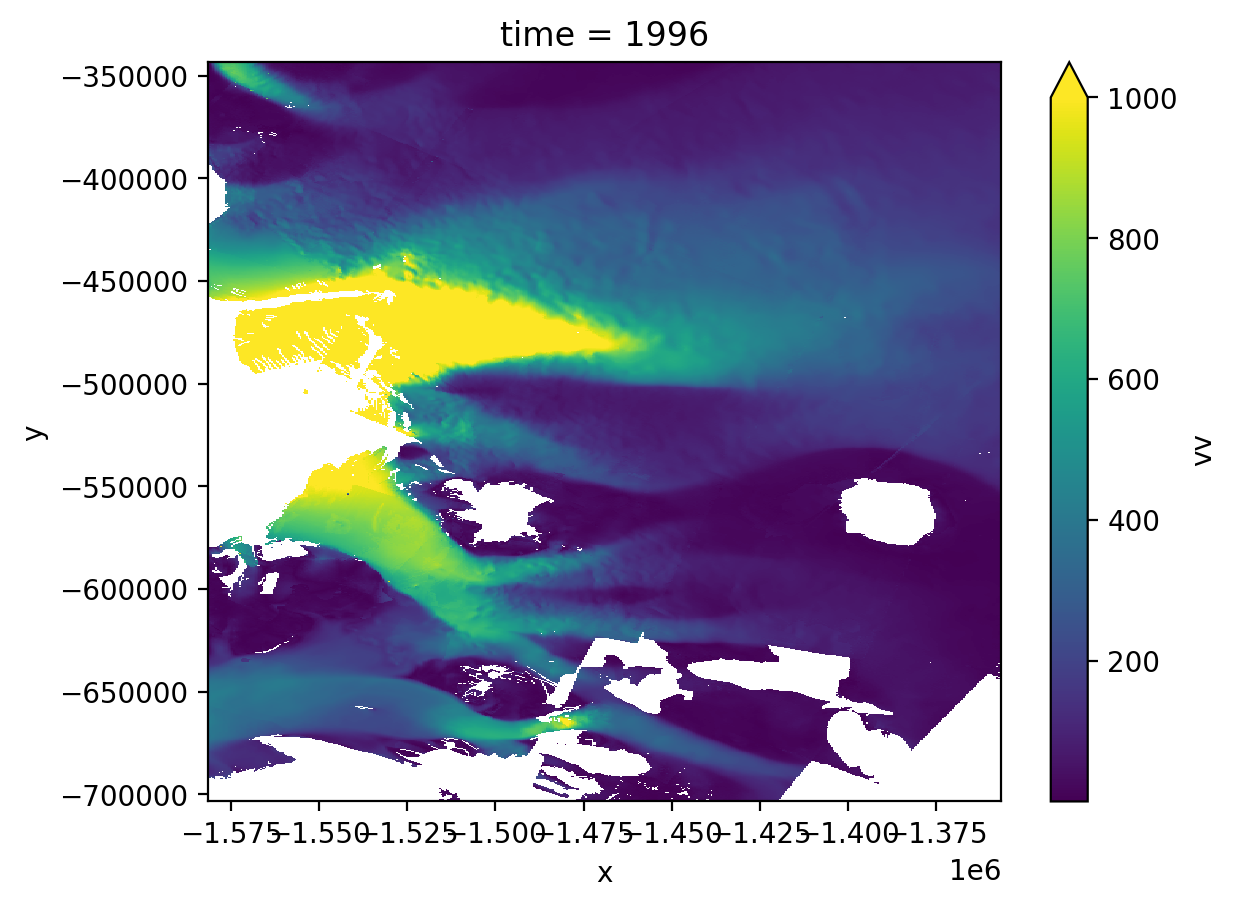

In [42]:
ds_merge.vv.isel(time=0).plot(vmax=1000)

In [43]:
ds_merge.attrs = ds.attrs
ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vv       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Now let's sample pts from a shapefile on `ds_merge` and plot it as a time series 

In [44]:
pt_path = './vel_sample_geom/velocity_sample.shp'
pt_df = gpd.read_file(pt_path)
xy = pt_df.geometry.bounds[pt_df.geometry.bounds.columns[:2]].rename(columns={'minx':'x','miny':'y'})

<Axes: title={'center': 'time = 1996'}, xlabel='x', ylabel='y'>

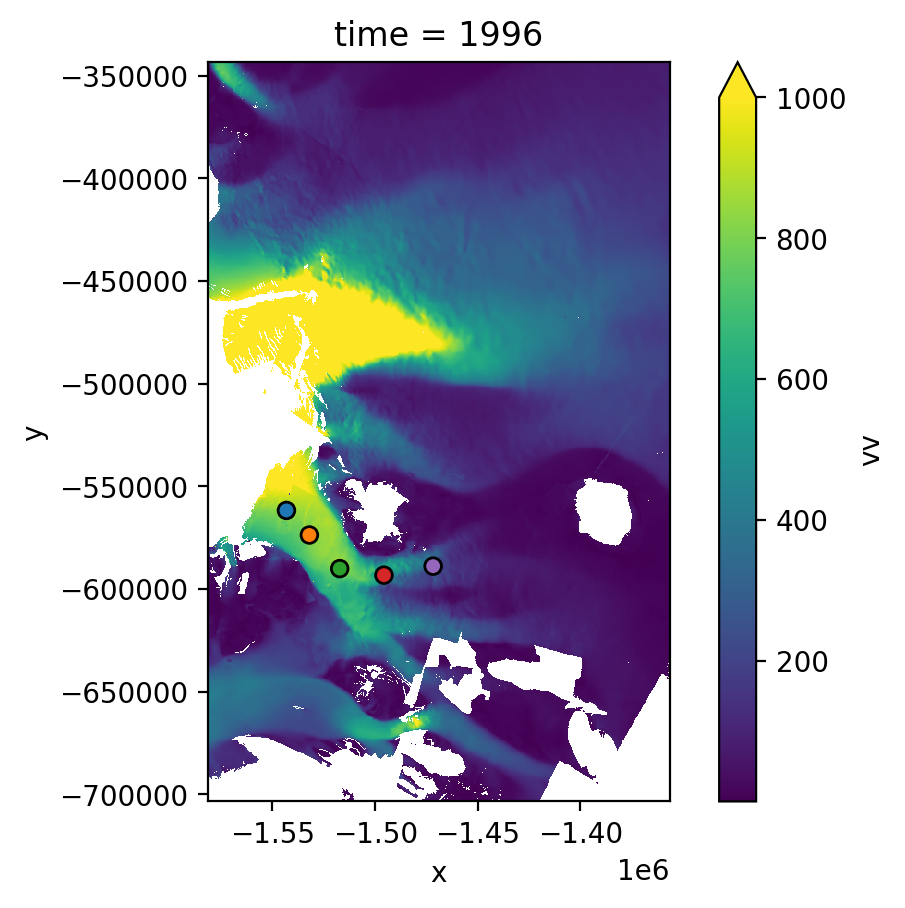

In [45]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax = plt.subplots()
ds_merge.vv.isel(time=0).plot(ax=ax,vmax=1000,)
pt_df.plot(ax=ax,c=colors,linewidth=1,edgecolor='black')

Sample velocities using `xy` 

Text(0, 0.5, 'm yr$^{-1}$')

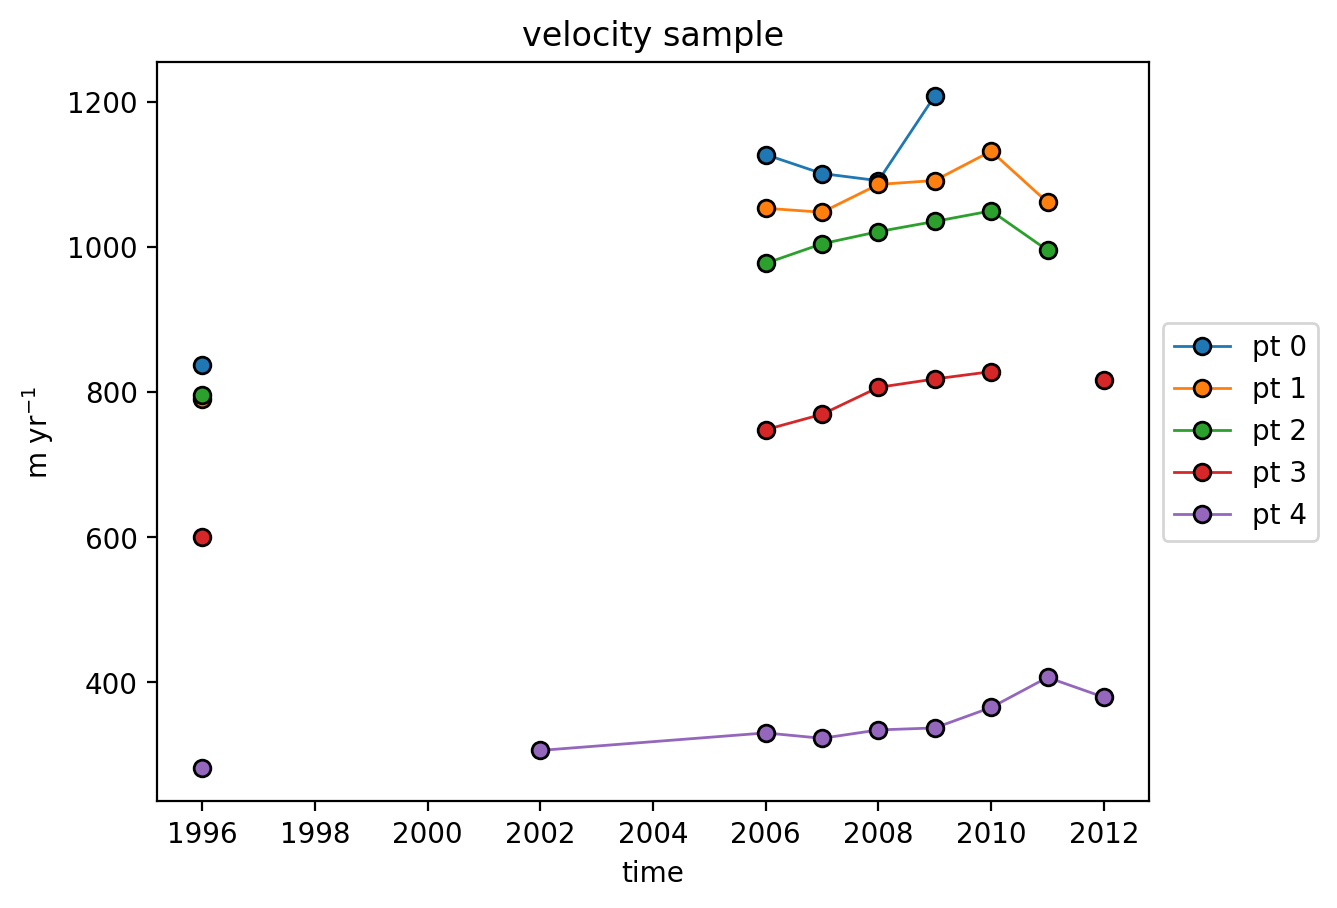

In [46]:
for index,row in xy.iterrows():
    x,y = row['x'], row['y']
    vel_sample = ds_merge.sel(x=x,y=y,method='nearest')
    vel_plot = vel_sample.vv.plot.line('-o',label=f'pt {index}',x='time', add_legend=True,
                                       linewidth=1,markeredgecolor='k')
plt.title('velocity sample')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('m yr$^{-1}$')

Missing data between 1998 - 2000. Lets check it out

<Axes: title={'center': 'time = 2000'}, xlabel='x', ylabel='y'>

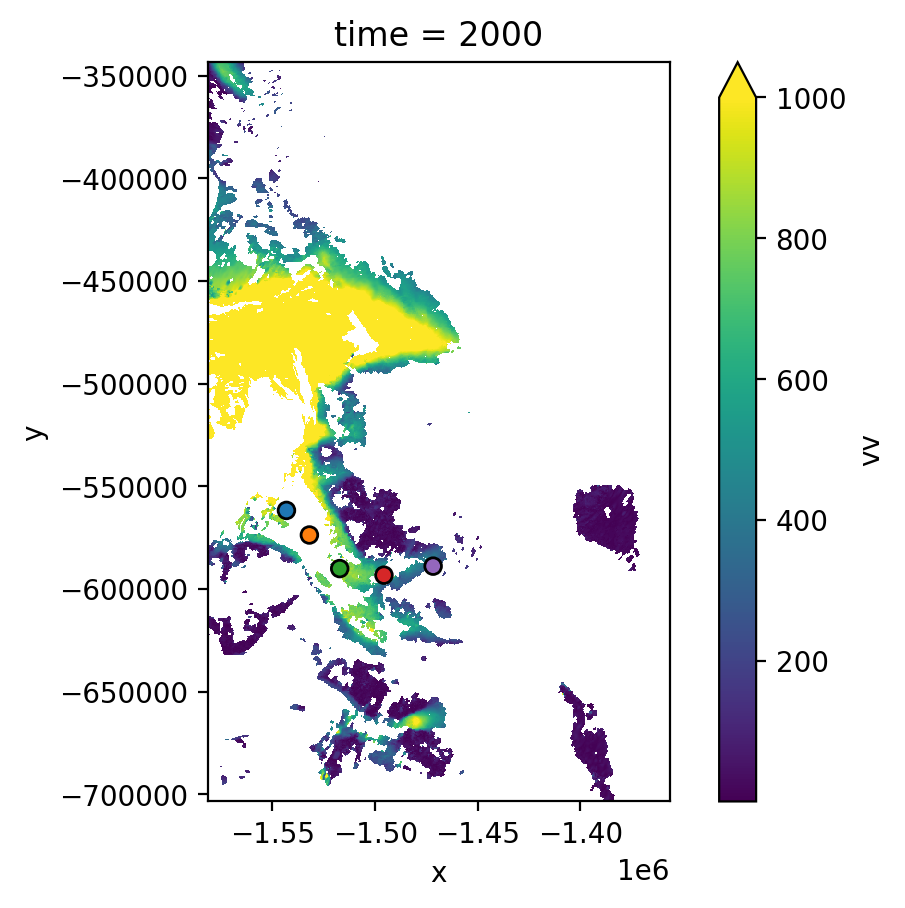

In [47]:
fig, ax = plt.subplots()
ds_merge.vv.isel(time=1).plot(ax=ax,vmax=1000,)
pt_df.plot(ax=ax,c=colors,linewidth=1,edgecolor='black')

## We finished! If we liked this, maybe we can watch some other package tutorials as a group?